In [1]:
import pandas as pd
import json
import re
import numpy as np

from sklearn.externals import joblib
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
pd.set_option('display.max_columns', 150)

## Preprocessing for clustering

* Impute missing values
* Normalize
* Dimensionality reduction
* Drop 'forwarded' column in pipeline

In [3]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.decomposition import PCA

In [26]:
text_features = joblib.load('text_features.pkl')

In [27]:
text_features.head()

,caps,commas,ex_marks,forwarded,msg_len,periods,q_marks,word_count,adj,adp,adv,cconj,det,intj,noun,num,part,pron,propn,punct,space,sym,verb,x,topic_0,topic_1,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_2,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_3,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_4,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_5,topic_6,topic_7,topic_8,topic_9,sent_score
0,1,0,0,False,20,0,0,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.027614
1,12,1,0,False,773,10,0,140,10.0,13.0,15.0,7.0,16.0,0.0,35.0,0.0,5.0,5.0,1.0,11.0,0.0,0.0,33.0,0.0,0.0,0.0,0.072857,0.072857,0.0,0.0,0.287143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.072857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.072857,0.0,0.0,0.0,0.0,0.287143,0.0,0.0,0.0,0.072857,0.0,2.074480
2,0,0,3,False,29,1,0,5,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.469960
3,6,1,0,False,180,2,0,34,2.0,5.0,0.0,2.0,4.0,0.0,9.0,0.0,1.0,2.0,4.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.336667,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.336667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,2.321281
4,2,0,0,False,33,1,0,7,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.631062


The feature `forwarded` is categorical, which neither PCA nor clustering will handle well, therefore let's drop it from the dataframe.

In [28]:
text_features.drop('forwarded', axis = 1, inplace = True)

In [29]:
X_matrix = text_features.as_matrix()

In [32]:
imp = Imputer(missing_values = 'NaN', strategy = 'mean')
X_imp = imp.fit_transform(X_matrix)

scaler = StandardScaler()
X_pca = scaler.fit_transform(X_imp)

pca = PCA()
pca_fit = pca.fit(X_pca)

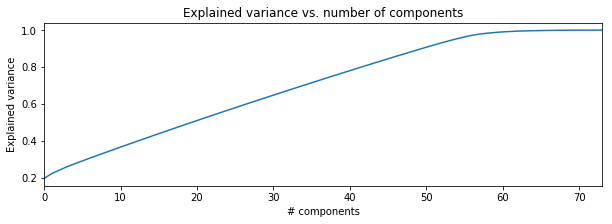

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax = pd.Series(pca_fit.explained_variance_ratio_.cumsum()).plot(kind = 'line', figsize = (10,3));
_ = ax.set(xlabel = '# components', ylabel = 'Explained variance',
      title = 'Explained variance vs. number of components');

In [49]:
num_comp = 55
pca2 = PCA(n_components = num_comp)
pca2_fit = pca2.fit(X_pca)

print('{0:.2%} of the variance is explained by the first {1} components out of {2} features.'\
      .format(pca2_fit.explained_variance_ratio_.cumsum()[-1], num_comp, text_features.shape[1]))

95.32% of the variance is explained by the first 55 components out of 74 features.


## Clustering

Code below from [sklearn's documentation](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py).

In [4]:
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl

In [68]:
X_gmm = pca_fit.fit_transform(X_pca)

In [69]:
lowest_bic = np.infty
bic = []
n_components_range = range(5, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components = n_components,
                              covariance_type = cv_type)
        _ = gmm.fit(X_gmm);
        bic.append(gmm.bic(X_gmm))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [72]:
gmm_pca = GaussianMixture(n_components = 19, covariance_type = 'full')
best_gmm_pca = gmm_pca.fit(X_gmm)

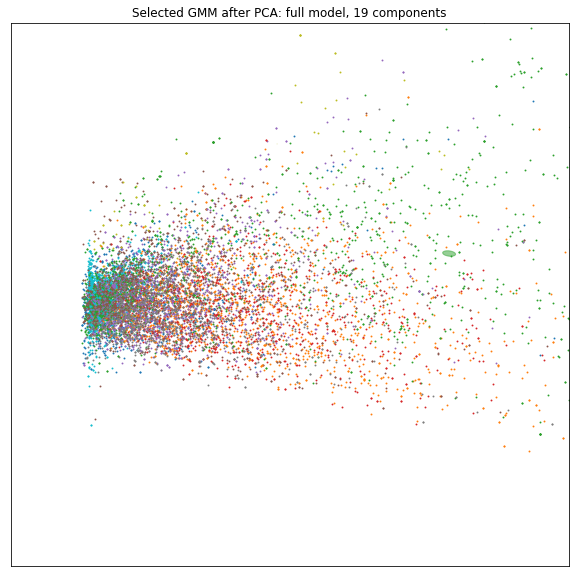

In [84]:
n_components = best_gmm_pca.get_params()['n_components']
colors = sns.color_palette(n_colors = n_components)

clf = best_gmm_pca
fig, splot = plt.subplots()
splot.set_xlim([-3, 5])
splot.set_ylim([-5, 5])
fig.set_size_inches(10, 10)
Y_ = clf.predict(X_gmm)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           colors)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_gmm[Y_ == i, 0], X_gmm[Y_ == i, 1], .8, color=color);

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell);

plt.xticks(());
plt.yticks(());
plt.title('Selected GMM after PCA: full model, {} components'.format(n_components));

In [76]:
best_gmm_pca.score_samples(X_gmm)

array([ 307.80480761,  -26.06773808,  294.66431354, ...,   63.26177788,
        306.02799245,   20.06555378])

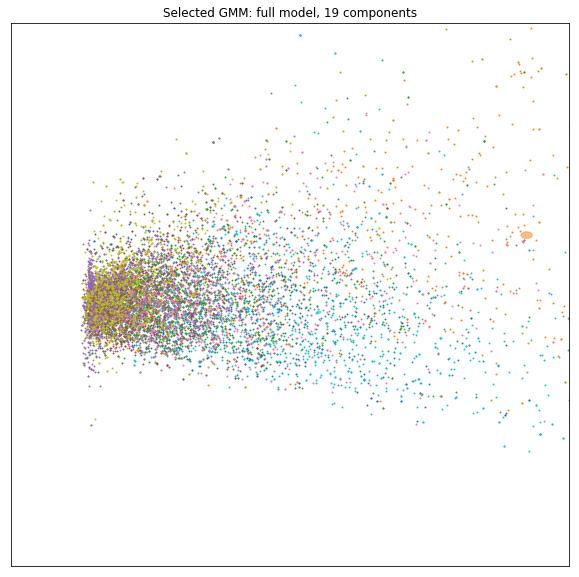

In [85]:
n_components = best_gmm.get_params()['n_components']
colors = sns.color_palette(n_colors = n_components)

clf = best_gmm
fig, splot = plt.subplots()
splot.set_xlim([-3, 5])
splot.set_ylim([-5, 5])
fig.set_size_inches(10, 10)
Y_ = clf.predict(X_gmm)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           colors)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_gmm[Y_ == i, 0], X_gmm[Y_ == i, 1], .8, color=color);

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell);

plt.xticks(());
plt.yticks(());
plt.title('Selected GMM: full model, {} components'.format(n_components));

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 19 The average silhouette_score is : -0.0919434170965


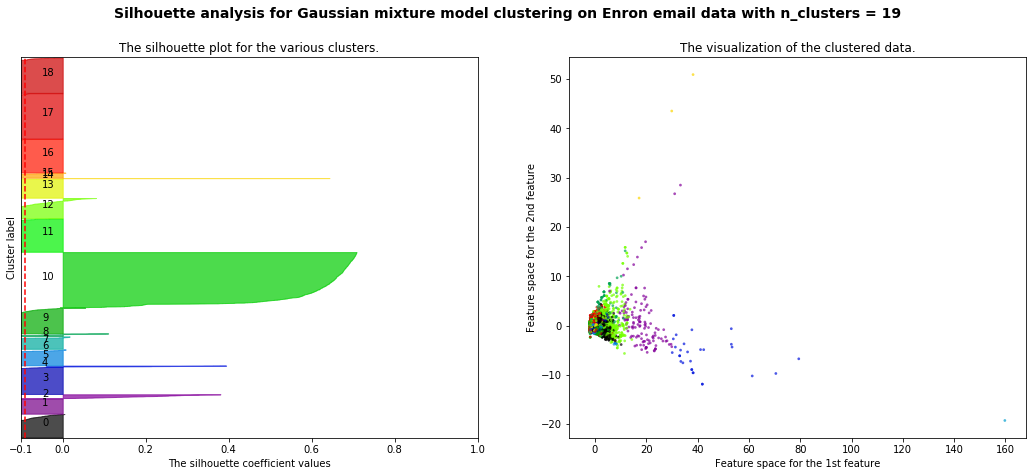

In [103]:
cluster_labels = best_gmm.predict(X_gmm)
range_n_clusters = [19]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    _ = fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    _ = ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    _ = ax1.set_ylim([0, len(X_gmm) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_gmm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_gmm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        _ = ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        _ = ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    _ = ax1.set_title("The silhouette plot for the various clusters.")
    _ = ax1.set_xlabel("The silhouette coefficient values")
    _ = ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    _ = ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    _ = ax1.set_yticks([])  # Clear the yaxis labels / ticks
    _ = ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    _ = ax2.scatter(X_gmm[:, 0], X_gmm[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                 c=colors, edgecolor='k')
 
    _ = ax2.set_title("The visualization of the clustered data.")
    _ = ax2.set_xlabel("Feature space for the 1st feature")
    _ = ax2.set_ylabel("Feature space for the 2nd feature")

    _ = plt.suptitle(("Silhouette analysis for Gaussian mixture model clustering on Enron email data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [105]:
cluster_labels.shape

(12017,)

In [106]:
text_features['cluster'] = cluster_labels

In [108]:
text_features.tail()

,caps,commas,ex_marks,msg_len,periods,q_marks,word_count,adj,adp,adv,cconj,det,intj,noun,num,part,pron,propn,punct,space,sym,verb,x,topic_0,topic_1,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_2,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_3,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_4,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_5,topic_6,topic_7,topic_8,topic_9,sent_score,cluster
12012,2,1,0,36,1,1,6,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.51,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,3.185923,1
12013,20,4,0,644,7,0,107,7.0,13.0,4.0,4.0,7.0,5.0,27.0,11.0,4.0,6.0,11.0,18.0,0.0,0.0,14.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.392673,0.0,0.0,0.0,0.0,0.0,0.102,0.0,0.111327,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102,0.102,0.00,0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.085795,5
12014,20,1,0,234,4,0,41,0.0,8.0,2.0,1.0,1.0,0.0,5.0,0.0,1.0,1.0,15.0,6.0,2.0,0.0,6.0,0.0,0.34,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.34,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.671448,13
12015,15,2,0,108,1,0,14,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,6.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.054377,10
12016,32,10,0,643,11,0,95,7.0,11.0,3.0,3.0,5.0,2.0,19.0,6.0,2.0,9.0,15.0,86.0,0.0,1.0,13.0,2.0,0.00,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.17,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.17,0.0,1.822937,5


## Cultivate's processed Enron data

In [45]:
path = '/Users/yuwenwu/insight/cultivate/data/processed/'
date_col = ['message__sent_at']
sentences_all_cols = pd.read_csv(path + 'enron_case_study_messages.csv', parse_dates = date_col)

In [46]:
sentences_all_cols.head()

,sentence_index,sentiment_value,message__id,message__chat__id,message__sent_at,message__contact__parent__id,concreteness,request_prob,politeness,is_question,message__provider_guid,message__chat__team__id,Inform_prob,Conventional_prob,Request-Action_prob,Request-Information_prob,da_label,da_prob,msg_size,advs,all_lemmas,articles,aux_verbs,convo_index,convo_size,imp_prons,non_stop_word_lemmas,num_female,num_female_pronouns,num_male,num_male_pronouns,num_subordinate,num_superior,num_unique_tokens,num_unknowngender,num_unknownpower,parent_id,parent_prob,per_prons,preps,quants,response_time,sender_gender,sub_conjs
0,3,1,5kT1sN1BY08ZfoTYcUHo_Q,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,3.980000,0.154175,0.447116,False,723973,XZwXgkxlOGssBijnWEMOig,0.269913,0.122803,0.005557,0.006111,Inform,0.269913,3,0,parsing#file#--#>>#o#:#\#portland#\#westdesk#\...,0,0,0,1,0,parsing#file#portland#westdesk#california#sche...,0,0,5,0,0,0,21,6,11,NaN,NaN,0,0,0,NaN,I,0
1,2,2,5kT1sN1BY08ZfoTYcUHo_Q,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,4.465000,0.229237,0.433185,False,723973,XZwXgkxlOGssBijnWEMOig,0.102239,0.345797,0.004580,0.009907,Conventional,0.345797,3,0,log#message,0,0,0,1,0,log#message,0,0,5,0,0,0,2,6,11,NaN,NaN,0,0,0,NaN,I,0
2,1,2,5kT1sN1BY08ZfoTYcUHo_Q,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,2.160000,0.148573,0.399924,False,723973,XZwXgkxlOGssBijnWEMOig,0.309767,0.073297,0.006243,0.005516,Inform,0.309767,3,0,no#variance#detect#.,0,0,0,1,0,variance#detect,0,0,5,0,0,0,4,6,11,NaN,NaN,0,0,0,NaN,I,0
3,0,1,5kT1sN1BY08ZfoTYcUHo_Q,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,3.296667,0.047411,0.389760,False,723973,XZwXgkxlOGssBijnWEMOig,0.357122,0.000236,0.006312,0.002823,Inform,0.357122,3,0,start#date#:#NUMBER/NUMBER/NUMBER#;#hourahead#...,0,0,0,1,0,start#date#hourahead#hour#ancillary#schedule#a...,0,0,5,0,0,0,15,6,11,NaN,NaN,0,0,0,NaN,I,0
4,3,1,5NLpNTSV2Ui1EZdCWFTbAg,0EUsnl18IABPqYfgDRHaoA,2001-10-06 07:38:26,bM1QDebT6vOFy4ifK_OcGA,3.980000,0.154175,0.447116,False,724694,XZwXgkxlOGssBijnWEMOig,0.269913,0.122803,0.005557,0.006111,Inform,0.269913,3,0,parsing#file#--#>>#o#:#\#portland#\#westdesk#\...,0,0,0,1,0,parsing#file#portland#westdesk#california#sche...,0,0,5,0,0,0,21,6,11,NaN,NaN,0,0,0,NaN,I,0


In [47]:
sentences = sentences_all_cols.copy()

In [48]:
sentences.drop(['message__id', 'da_label', 'da_prob', 'all_lemmas',
               'non_stop_word_lemmas'], axis = 1, inplace = True)

cols = ['sent_index', 'sentiment', 'thread_id', 'timestamp',
       'sender_id', 'concrete', 'request_prob', 'polite_prob',
       'question', 'msg_id', 'team_id', 'inform', 'conventional',
        'request_action', 'request_info', 'msg_size', 'adv',
       'articles', 'aux_verbs', 'convo_index', 'convo_size',
       'imp_prons', 'female_recipients', 'female_prons',
       'male_recipients', 'male_prons', 'subordinates',
       'superiors', 'unique_tokens', 'gender_unknown',
       'power_unknown', 'parent_predict', 'parent_prob',
       'per_prons', 'preps', 'quants', 'response_time', 'sender_gender', 'sub_conjs']
sentences.columns = cols
sentences.head()

,sent_index,sentiment,thread_id,timestamp,sender_id,concrete,request_prob,polite_prob,question,msg_id,team_id,inform,conventional,request_action,request_info,msg_size,adv,articles,aux_verbs,convo_index,convo_size,imp_prons,female_recipients,female_prons,male_recipients,male_prons,subordinates,superiors,unique_tokens,gender_unknown,power_unknown,parent_predict,parent_prob,per_prons,preps,quants,response_time,sender_gender,sub_conjs
0,3,1,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,3.980000,0.154175,0.447116,False,723973,XZwXgkxlOGssBijnWEMOig,0.269913,0.122803,0.005557,0.006111,3,0,0,0,0,1,0,0,0,5,0,0,0,21,6,11,NaN,NaN,0,0,0,NaN,I,0
1,2,2,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,4.465000,0.229237,0.433185,False,723973,XZwXgkxlOGssBijnWEMOig,0.102239,0.345797,0.004580,0.009907,3,0,0,0,0,1,0,0,0,5,0,0,0,2,6,11,NaN,NaN,0,0,0,NaN,I,0
2,1,2,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,2.160000,0.148573,0.399924,False,723973,XZwXgkxlOGssBijnWEMOig,0.309767,0.073297,0.006243,0.005516,3,0,0,0,0,1,0,0,0,5,0,0,0,4,6,11,NaN,NaN,0,0,0,NaN,I,0
3,0,1,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,3.296667,0.047411,0.389760,False,723973,XZwXgkxlOGssBijnWEMOig,0.357122,0.000236,0.006312,0.002823,3,0,0,0,0,1,0,0,0,5,0,0,0,15,6,11,NaN,NaN,0,0,0,NaN,I,0
4,3,1,0EUsnl18IABPqYfgDRHaoA,2001-10-06 07:38:26,bM1QDebT6vOFy4ifK_OcGA,3.980000,0.154175,0.447116,False,724694,XZwXgkxlOGssBijnWEMOig,0.269913,0.122803,0.005557,0.006111,3,0,0,0,0,1,0,0,0,5,0,0,0,21,6,11,NaN,NaN,0,0,0,NaN,I,0


In [49]:
def generate_new_ids(col_name, df = sentences):
    original_strings = df[col_name].unique()
    id_num = 0
    new_ids = {}
    for string in original_strings:
        new_ids[string] = str(id_num)
        id_num += 1
    df[col_name] = df[col_name].map(new_ids.get)
    return df, new_ids

sentences, thread_id_map = generate_new_ids('thread_id')
sentences, sender_id_map = generate_new_ids('sender_id')
pickle.dump(thread_id_map, open('thread_id_map.p', 'wb'))
pickle.dump(sender_id_map, open('sender_id_map.p', 'wb'))
sentences, _ = generate_new_ids('team_id')
sentences, _ = generate_new_ids('parent_predict')
sentences.head()

,sent_index,sentiment,thread_id,timestamp,sender_id,concrete,request_prob,polite_prob,question,msg_id,team_id,inform,conventional,request_action,request_info,msg_size,adv,articles,aux_verbs,convo_index,convo_size,imp_prons,female_recipients,female_prons,male_recipients,male_prons,subordinates,superiors,unique_tokens,gender_unknown,power_unknown,parent_predict,parent_prob,per_prons,preps,quants,response_time,sender_gender,sub_conjs
0,3,1,0,2001-10-05 02:38:26,0,3.980000,0.154175,0.447116,False,723973,0,0.269913,0.122803,0.005557,0.006111,3,0,0,0,0,1,0,0,0,5,0,0,0,21,6,11,0,NaN,0,0,0,NaN,I,0
1,2,2,0,2001-10-05 02:38:26,0,4.465000,0.229237,0.433185,False,723973,0,0.102239,0.345797,0.004580,0.009907,3,0,0,0,0,1,0,0,0,5,0,0,0,2,6,11,0,NaN,0,0,0,NaN,I,0
2,1,2,0,2001-10-05 02:38:26,0,2.160000,0.148573,0.399924,False,723973,0,0.309767,0.073297,0.006243,0.005516,3,0,0,0,0,1,0,0,0,5,0,0,0,4,6,11,0,NaN,0,0,0,NaN,I,0
3,0,1,0,2001-10-05 02:38:26,0,3.296667,0.047411,0.389760,False,723973,0,0.357122,0.000236,0.006312,0.002823,3,0,0,0,0,1,0,0,0,5,0,0,0,15,6,11,0,NaN,0,0,0,NaN,I,0
4,3,1,0,2001-10-06 07:38:26,0,3.980000,0.154175,0.447116,False,724694,0,0.269913,0.122803,0.005557,0.006111,3,0,0,0,0,1,0,0,0,5,0,0,0,21,6,11,0,NaN,0,0,0,NaN,I,0


In [53]:
groupby = sentences.groupby('msg_id')
convo_size = groupby['convo_size']
avgs = groupby.mean()
stds = groupby.std()
sums = groupby.sum()
avgs.head()

,sent_index,sentiment,concrete,request_prob,polite_prob,question,inform,conventional,request_action,request_info,msg_size,adv,articles,aux_verbs,convo_index,convo_size,imp_prons,female_recipients,female_prons,male_recipients,male_prons,subordinates,superiors,unique_tokens,gender_unknown,power_unknown,parent_prob,per_prons,preps,quants,sub_conjs
msg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1.5,1.500000,2.602371,0.383466,0.517987,0.0,0.501998,0.004534,0.010361,0.009096,3.0,0.500000,0.250000,0.750000,0.0,1.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,15.000000,7.0,12.0,NaN,2.500000,1.500000,0.250000,0.250000
5,2.5,1.333333,3.134820,0.308676,0.515260,0.0,0.363733,0.244143,0.008651,0.010642,5.0,0.166667,0.500000,0.166667,0.0,1.0,0.0,0.0,0.0,5.0,0.166667,0.0,0.0,11.500000,6.0,11.0,NaN,0.666667,1.500000,0.500000,0.166667
6,4.0,1.555556,2.397724,0.175903,0.531130,0.0,0.615570,0.003230,0.004679,0.004471,8.0,0.666667,1.666667,0.444444,0.0,1.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,16.555556,6.0,11.0,NaN,0.222222,1.555556,0.555556,0.222222
37,2.5,1.333333,2.514151,0.230190,0.492014,0.0,0.585759,0.002017,0.022334,0.003986,5.0,0.666667,2.000000,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,16.833333,2.0,2.0,NaN,0.333333,1.500000,1.500000,0.500000
39,11.0,1.347826,2.384991,0.270916,0.539568,0.0,0.609613,0.001993,0.002383,0.013909,22.0,0.434783,1.391304,0.826087,0.0,1.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,20.217391,10.0,15.0,NaN,1.782609,2.086957,1.043478,0.347826


In [34]:
pickle.dump(sentences, open('cultivate_sentences.p', 'wb'))
pickle.dump(messages, open('cultivate_messages.p', 'wb'))

In [11]:
messages.shape

(71246, 28)

In [12]:
X_matrix = messages.as_matrix()

In [13]:
imp = Imputer(missing_values = 'NaN', strategy = 'mean')
X_imp = imp.fit_transform(X_matrix)

scaler = StandardScaler()
X_gmm = scaler.fit_transform(X_imp)

In [15]:
lowest_bic = np.infty
bic = []
n_components_range = range(5, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components = n_components,
                              covariance_type = cv_type)
        _ = gmm.fit(X_gmm);
        bic.append(gmm.bic(X_gmm))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

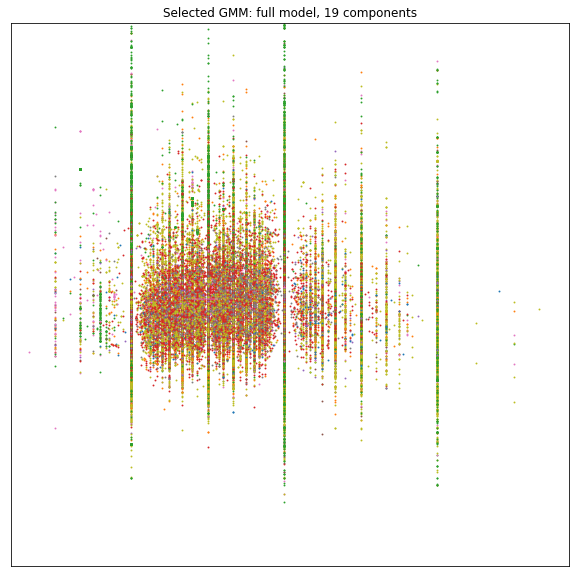

In [18]:
n_components = best_gmm.get_params()['n_components']
cv_type = best_gmm.get_params()['covariance_type']
colors = sns.color_palette(n_colors = n_components)

clf = best_gmm
fig, splot = plt.subplots()
splot.set_xlim([-3, 5])
splot.set_ylim([-5, 5])
fig.set_size_inches(10, 10)
Y_ = clf.predict(X_gmm)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           colors)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_gmm[Y_ == i, 0], X_gmm[Y_ == i, 1], .8, color=color);

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell);

plt.xticks(());
plt.yticks(());
plt.title('Selected GMM: {} model, {} components'.format(cv_type, n_components));

In [ ]:
cluster_labels = best_gmm.predict(X_gmm)
range_n_clusters = [n_components]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    _ = fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    _ = ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    _ = ax1.set_ylim([0, len(X_gmm) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_gmm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_gmm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        _ = ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        _ = ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    _ = ax1.set_title("The silhouette plot for the various clusters.")
    _ = ax1.set_xlabel("The silhouette coefficient values")
    _ = ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    _ = ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    _ = ax1.set_yticks([])  # Clear the yaxis labels / ticks
    _ = ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    _ = ax2.scatter(X_gmm[:, 0], X_gmm[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                 c=colors, edgecolor='k')
 
    _ = ax2.set_title("The visualization of the clustered data.")
    _ = ax2.set_xlabel("Feature space for the 1st feature")
    _ = ax2.set_ylabel("Feature space for the 2nd feature")

    _ = plt.suptitle(("Silhouette analysis for Gaussian mixture model clustering on Enron email data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [14]:
import scikitplot.plotters as skplt
from scikitplot import clustering_factory
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_samples

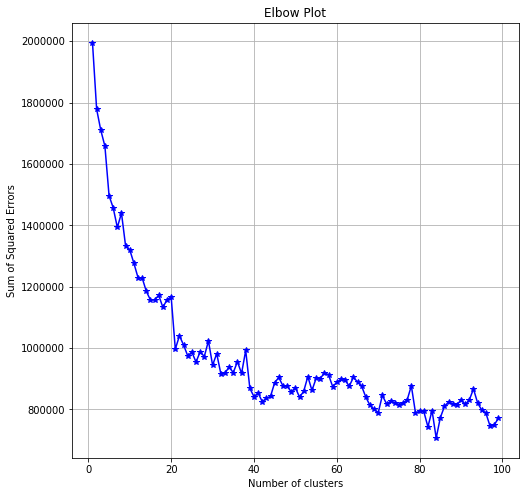

In [15]:
X_kmeans = X_gmm.copy()
kmeans = clustering_factory(MiniBatchKMeans(random_state = 1))
kmeans_plot = kmeans.plot_elbow_curve(X_kmeans, 
                                      cluster_ranges = range(1, 100), 
                                      figsize = (8, 8))

In [16]:
num_clusters = 20
km = KMeans(n_clusters = num_clusters)
%time km.fit(X_kmeans)

CPU times: user 16.5 s, sys: 4.72 s, total: 21.2 s
Wall time: 21.3 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
clusters = km.labels_.tolist()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = messages.columns.tolist()

In [37]:
pickle.dump(clusters, open('clusters_kmeans.p', 'wb'))

In [33]:
cluster_values = pd.DataFrame()
for i in range(num_clusters):
    centroid_values = []
    for idx in order_centroids[i]:
        centroid_values.append(terms[idx])
    cluster_values['cluster ' + str(i)] = centroid_values

cluster_values

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10,cluster 11,cluster 12,cluster 13,cluster 14,cluster 15,cluster 16,cluster 17,cluster 18,cluster 19
0,per_prons,articles,power_unknown,request_info,concrete,power_unknown,male_prons,quants,conventional,superiors,female_prons,subordinates,power_unknown,request_action,imp_prons,parent_prob,msg_size,sub_conjs,question,adv
1,polite_prob,preps,gender_unknown,question,male_recipients,gender_unknown,per_prons,unique_tokens,sentiment,gender_unknown,per_prons,gender_unknown,gender_unknown,request_prob,male_prons,msg_size,articles,adv,request_info,inform
2,inform,unique_tokens,female_recipients,request_prob,parent_prob,female_recipients,inform,preps,polite_prob,articles,aux_verbs,female_recipients,male_recipients,polite_prob,adv,quants,preps,aux_verbs,request_prob,sub_conjs
3,aux_verbs,inform,male_recipients,aux_verbs,request_action,male_recipients,aux_verbs,concrete,request_action,power_unknown,adv,power_unknown,female_recipients,sub_conjs,aux_verbs,imp_prons,unique_tokens,per_prons,per_prons,preps
4,request_prob,quants,superiors,per_prons,imp_prons,preps,adv,parent_prob,parent_prob,inform,inform,male_recipients,unique_tokens,request_info,sentiment,preps,male_prons,unique_tokens,polite_prob,articles
5,adv,sub_conjs,articles,polite_prob,conventional,articles,sub_conjs,request_action,request_prob,preps,sentiment,superiors,quants,unique_tokens,per_prons,subordinates,quants,articles,aux_verbs,unique_tokens
6,sentiment,adv,unique_tokens,sentiment,subordinates,concrete,unique_tokens,subordinates,concrete,unique_tokens,sub_conjs,quants,articles,articles,inform,request_action,adv,preps,sentiment,question
7,sub_conjs,aux_verbs,aux_verbs,parent_prob,female_prons,quants,preps,imp_prons,subordinates,quants,unique_tokens,request_prob,aux_verbs,per_prons,subordinates,request_prob,sub_conjs,inform,parent_prob,male_prons
8,articles,msg_size,inform,imp_prons,power_unknown,unique_tokens,articles,msg_size,imp_prons,female_recipients,preps,sentiment,preps,superiors,question,female_prons,female_recipients,polite_prob,adv,imp_prons
9,parent_prob,polite_prob,preps,adv,gender_unknown,parent_prob,imp_prons,superiors,superiors,sub_conjs,articles,inform,concrete,female_recipients,sub_conjs,inform,male_recipients,quants,conventional,request_info


In [28]:
order_centroids.shape
messages.shape

(20, 28)

(71246, 28)